In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to add a channel dimension (grayscale → 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28, 1), Labels shape: (60000,)
Testing data shape: (10000, 28, 28, 1), Labels shape: (10000,)


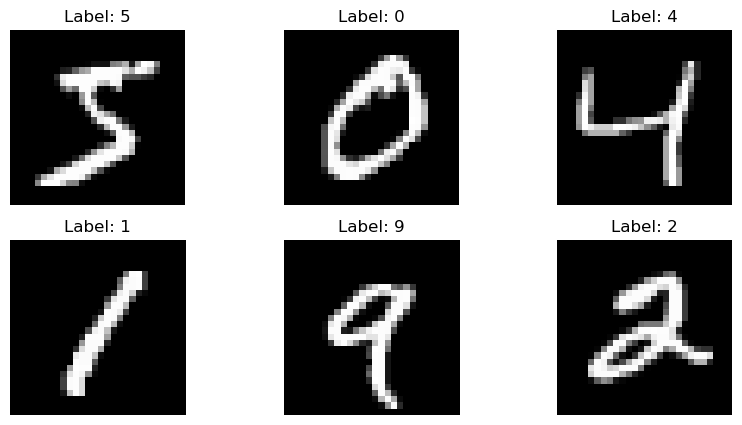

In [3]:
# Display some images
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [12]:
#layers.Conv2D(filters, kernel_size, strides=(1,1), padding='valid', activation=None, input_shape=None)

Parameter	Description
filters	The number of filters (kernels) applied to the input. Each filter learns a different feature.
kernel_size	The size of each filter (e.g., (3,3), (5,5)).
strides	The step size for moving the filter across the image (default: (1,1)).
padding	Controls the output size: 'valid' (no padding) or 'same' (zero-padding to keep size same).
activation	Activation function like 'relu', 'sigmoid', or 'tanh'.
input_shape	Defines the input dimensions for the first layer (e.g., (28, 28, 1)).

In [4]:
from tensorflow.keras import layers, models, Input

model = models.Sequential([
    Input(shape=(28, 28, 1)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu'), 
    #layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8911 - loss: 0.3505 - val_accuracy: 0.9799 - val_loss: 0.0617
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9848 - loss: 0.0498 - val_accuracy: 0.9886 - val_loss: 0.0374
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9859 - val_loss: 0.0416
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9920 - loss: 0.0241 - val_accuracy: 0.9866 - val_loss: 0.0419
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 0.9887 - val_loss: 0.0409


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0497
Test accuracy: 0.9888


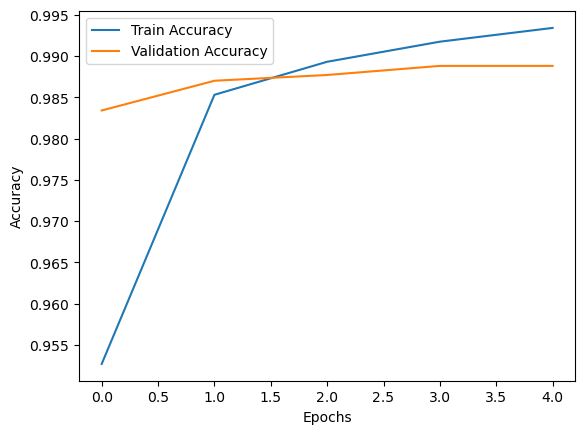

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


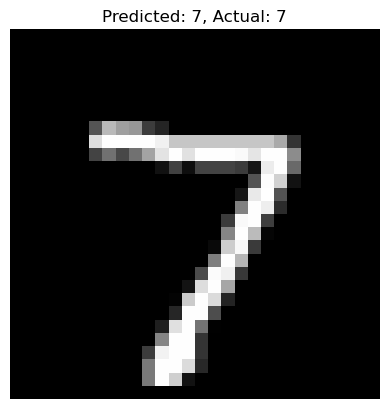

In [11]:
import numpy as np

# Select a test image
index = 0  # Change this to test different images
test_image = np.expand_dims(x_test[index], axis=0)

# Predict the class
predictions = model.predict(test_image)
predicted_label = np.argmax(predictions)

# Display the result
plt.imshow(x_test[index].squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()